In [ ]:
!pip3 install transformers --upgrade
!pip3 install tensorflow --upgrade
!pip3 install tensorflow-text --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 39.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the path to the Drive directory
drive_path = "/content/drive/MyDrive"

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# Define the dataset path
dataset_path = os.path.join(drive_path, "dataset_code_language.csv")

# Read the dataset into a DataFrame
df = pd.read_csv(dataset_path)

# Print random examples
df.sample(n=15)

,code,language
10290,<?php\n/*-------------------------------------...,php
5944,"<!doctype HTML public ""-//W3C//DTD HTML 4.0 Fr...",html
3886,/*!\n * Datepicker for Bootstrap v1.7.0-dev (h...,css
12584,from __future__ import unicode_literals\n\nimp...,python
9743,/**\nCopyright (c) 2015 The Chromium Authors. ...,javascript
11907,<?php\n\n\nnamespace WPExpress\UI;\n\n\nuse Mu...,php
7834,"/* global malarkey:false, moment:false */\n(fu...",javascript
3863,@import url(https://fonts.googleapis.com/css?f...,css
6757,<HTML>\r\n<HEAD>\r\n<TITLE>1997 ACA Zoo Criter...,html
1022,"#!/bin/sh\nset -e\n\necho ""mkdir -p ${CONFIGUR...",bash


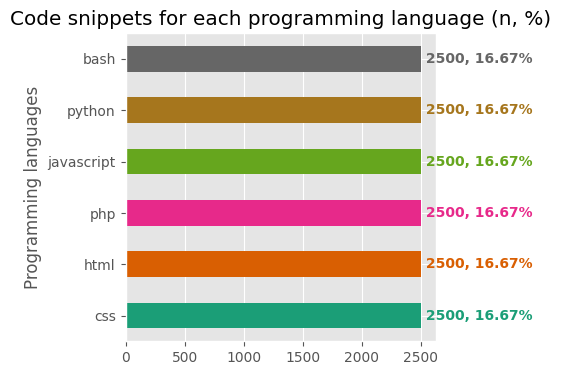

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Define your custom order and reverse it for correct display
order = ['bash', 'python', 'javascript', 'php', 'html', 'css'][::-1]

# Count the values and sort by the custom order
counts = df["language"].value_counts()
counts = counts.loc[order]

num_classes = len(counts)
colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

counts.plot.barh(title="Code snippets for each programming language (n, %)", 
                 ylabel="Programming languages",
                 color=colors,
                 figsize=(4,4))

for i, v in enumerate(counts):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%", 
           color=c, 
           va="center", 
           fontweight="bold")

plt.show()

In [ ]:
class_labels = ["bash", "python", "javascript", "php", "html", "css"]

# Create a dictionary mapping each label to its index
class_indexes = {label: index for index, label in enumerate(class_labels)}

# Print the mapping to make it explicit
for class_label, index in class_indexes.items():
    print(f"{class_label}: {index}")

# Map topics descriptions to labels
df["label"] = df["language"].map(class_indexes)

bash: 0
python: 1
javascript: 2
php: 3
html: 4
css: 5


In [ ]:
def print_random_sample(df, col_name, col_value, chars=180):
  '''print a random sample
  Args:
    - df: input dataframe
    - col_name: column to use as filter (e.g. label)
    - col_value: value of col_name to use as filter 
    - chars (optional, def:180) max number of characters to display
  '''
  if col_name not in df.columns:
    print(f"Column '{col_name}' does not exist in the dataframe.")
    return

  if col_value not in df[col_name].unique():
    print(f"Value '{col_value}' does not exist in column '{col_name}'.")
    return

  filtered_df = df[df[col_name]==col_value]  
  if len(filtered_df) > 0:
    code = filtered_df.sample()["code"].values[0]
    print(f"Label: {col_value}\nCode Sample:\n```\n{code[0:chars]} ...\n```\n{'-'*50}\n")

num_labels = len(df["label"].unique())
for label_idx in range(num_labels):
  print_random_sample(df, "label", label_idx)

Label: 0
Code Sample:
```
# Use add_opt to set HAVE_FOO variables the first time
# example: add_opt FOO no
#
# Only needed when check_enabled ($2), check_platform, check_lib, check_pkgconf,
# check_header,  ...
```
--------------------------------------------------

Label: 1
Code Sample:
```
from django.apps import apps
from django.template import Library

register = Library()

if apps.is_installed('django.contrib.staticfiles'):
    from django.contrib.staticfiles.temp ...
```
--------------------------------------------------

Label: 2
Code Sample:
```
'use strict';

// Configuring the Articles module
angular.module('admin').run(['Menus',
   function(Menus) {
      // Set top bar menu items
      Menus.addMenuItem('topbar', 'Admi ...
```
--------------------------------------------------

Label: 3
Code Sample:
```
<?php

session_start();

echo "Tu usuario es: ".$_SESSION['usuario']."<br /> Tu contraseña es: ".$_SESSION['contrasena'];

$usuario = $_SESSION['usuario'];
$contrasena = $_S

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

y = tf.keras.utils.to_categorical(df["label"].values, num_classes=num_classes)

# Split the dataset into a train set (80%) and a temporary set (20%)
# Use the 'stratify' parameter to maintain the same distribution for labels in both sets
X_train, X_temp, y_train, y_temp = train_test_split(df["code"], y, test_size=0.2, random_state=42, stratify=y)

# Split the temporary set into a validation set (10%) and a test set (10%)
# Again, use the 'stratify' parameter to maintain the same distribution for labels in both sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())  # Should return True
print(tf.config.list_physical_devices('GPU'))  # Should list your GPU devices

True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
import tensorflow_hub as tf_hub
import tensorflow_text as tf_text

preprocessor_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

preprocessor = tf_hub.KerasLayer(preprocessor_url)
encoder = tf_hub.KerasLayer(encoder_url)

In [ ]:
with tf.device('/GPU:0'):
    preprocessor = tf_hub.KerasLayer(preprocessor_url)
    encoder = tf_hub.KerasLayer(encoder_url, trainable=True)

    # BERT layers
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessed_text = preprocessor(text_input)
    outputs = encoder(preprocessed_text)

    # Neural network layers
    l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs["pooled_output"]) # 0.1 TODO: check this
    l = tf.keras.layers.Dense(num_classes, activation="softmax", name="output")(l) # sigmoid TODO: check this

    # Use inputs and outputs to construct a final model
    model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [ ]:
from keras import backend as K

def balanced_recall(y_true, y_pred):
    """This function calculates the balanced recall metric
    recall = TP / (TP + FN)
    """
    recall_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true_class, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        recall_by_class = recall_by_class + recall
    return recall_by_class / y_pred.shape[1]

def balanced_precision(y_true, y_pred):
    """This function calculates the balanced precision metric
    precision = TP / (TP + FP)
    """
    precision_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred_class, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        precision_by_class = precision_by_class + precision
    # return average balanced metric for each class
    return precision_by_class / y_pred.shape[1]

def balanced_f1_score(y_true, y_pred):
    """This function calculates the F1 score metric"""
    precision = balanced_precision(y_true, y_pred)
    recall = balanced_recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [ ]:
# Define a EarlyStopping callback
earlystop_callback = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss", 
    patience = 15,
    restore_best_weights = True)

# Ensure the directory exists
os.makedirs(os.path.join(drive_path, "models"), exist_ok=True)

# Define a ModelCheckpoint callback to save model every 10 epochs
model_checkpoint_callback_periodic = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(drive_path, "models", "code_snippets_classifier_periodic.h5"),
    save_weights_only=False,
    period=10)

# Define a ModelCheckpoint callback to save the best model only
model_checkpoint_callback_best = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(drive_path, "models", "code_snippets_classifier_best.h5"),
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [ ]:
from tensorflow import keras
from keras.optimizers import Adam

# Define number of epochs
n_epochs = 150

# Define batch size
batch_size = 32

# Define learning rate and decay
#learning_rate = 5e-5
#decay = 0.01

# Create an optimizer with learning rate and decay
#optimizer = Adam(learning_rate=learning_rate, decay=decay)

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = [tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
                         balanced_recall,
                         balanced_precision,
                         balanced_f1_score])

model_fit = model.fit(X_train, 
                      y_train, 
                      epochs = n_epochs,
                      #batch_size = batch_size,
                      validation_data = (X_val, y_val),
                      callbacks = [earlystop_callback, model_checkpoint_callback_periodic, model_checkpoint_callback_best])

Epoch 1/150


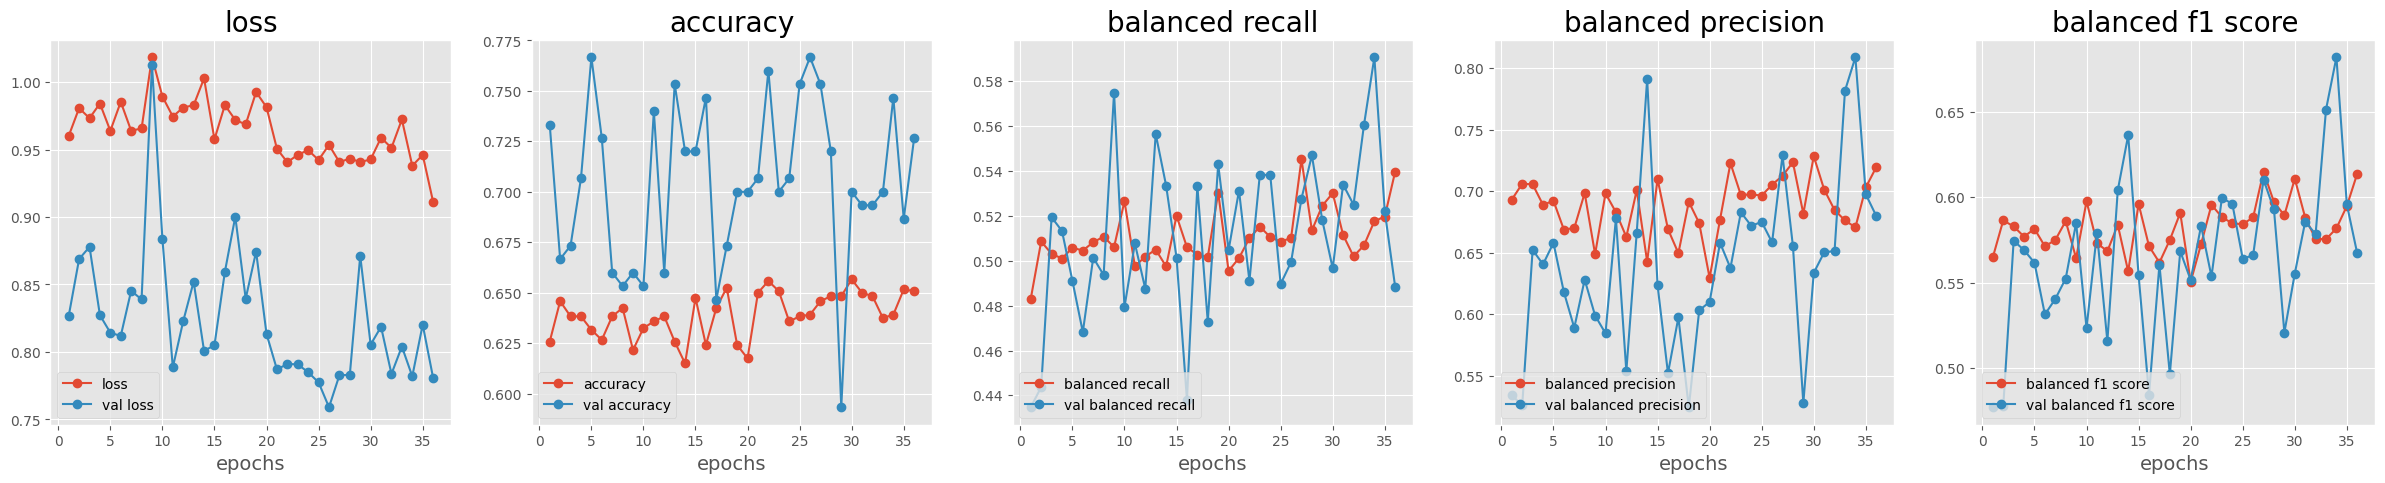

In [ ]:
def plot_metrics(model_fit, total_epochs):
    """Plot the training metrics for each epoch.
    Args:
    model_fit: The history object from model.fit().
    total_epochs: The total number of epochs for model training.
    """
    actual_epochs = len(model_fit.history['loss'])
    if total_epochs != actual_epochs:
      total_epochs = actual_epochs
    x = list(range(1, total_epochs+1))
    metric_list = list(model_fit.history.keys())
    num_metrics = len(metric_list) // 2

    fig, ax = plt.subplots(nrows=1, ncols=num_metrics, figsize=(30, 5))

    for i in range(num_metrics):
        ax[i].plot(x, model_fit.history[metric_list[i]], marker="o", label=metric_list[i].replace("_", " "))
        ax[i].plot(x, model_fit.history[metric_list[i+num_metrics]], marker="o", label=metric_list[i+num_metrics].replace("_", " "))
        ax[i].set_xlabel("epochs",fontsize=14)
        ax[i].set_title(metric_list[i].replace("_", " "),fontsize=20)
        ax[i].legend(loc="lower left")
    plt.show()

# Plot the metrics
plot_metrics(model_fit, n_epochs)

In [ ]:
# Load model
model = tf.keras.models.load_model(os.path.join(drive_path, "models", "code_snippets_classifier_best.h5"), 
                   custom_objects={
                       'KerasLayer': tf_hub.KerasLayer,
                       'balanced_recall': balanced_recall,
                       'balanced_precision': balanced_precision,
                       'balanced_f1_score': balanced_f1_score})

In [ ]:
# Continue training
additional_epochs = 100
model_fit = model.fit(X_train, 
                      y_train, 
                      epochs = additional_epochs,
                      batch_size = batch_size,
                      validation_data = (X_val, y_val),
                      callbacks = [earlystop_callback, model_checkpoint_callback_periodic, model_checkpoint_callback_best])

Epoch 1/100
38/38 [==============================] - 62s 1s/step - loss: 0.9028 - accuracy: 0.6775 - balanced_recall: 0.5447 - balanced_precision: 0.7433 - balanced_f1_score: 0.6254 - val_loss: 0.7701 - val_accuracy: 0.7467 - val_balanced_recall: 0.5138 - val_balanced_precision: 0.6986 - val_balanced_f1_score: 0.5893
Epoch 2/100
38/38 [==============================] - 43s 1s/step - loss: 0.9413 - accuracy: 0.6575 - balanced_recall: 0.5386 - balanced_precision: 0.7294 - balanced_f1_score: 0.6166 - val_loss: 0.7980 - val_accuracy: 0.7400 - val_balanced_recall: 0.5011 - val_balanced_precision: 0.6960 - val_balanced_f1_score: 0.5811
Epoch 3/100
38/38 [==============================] - 44s 1s/step - loss: 0.9491 - accuracy: 0.6508 - balanced_recall: 0.5184 - balanced_precision: 0.6943 - balanced_f1_score: 0.5900 - val_loss: 0.7666 - val_accuracy: 0.7400 - val_balanced_recall: 0.5658 - val_balanced_precision: 0.7867 - val_balanced_f1_score: 0.6578
Epoch 4/100
38/38 [========================

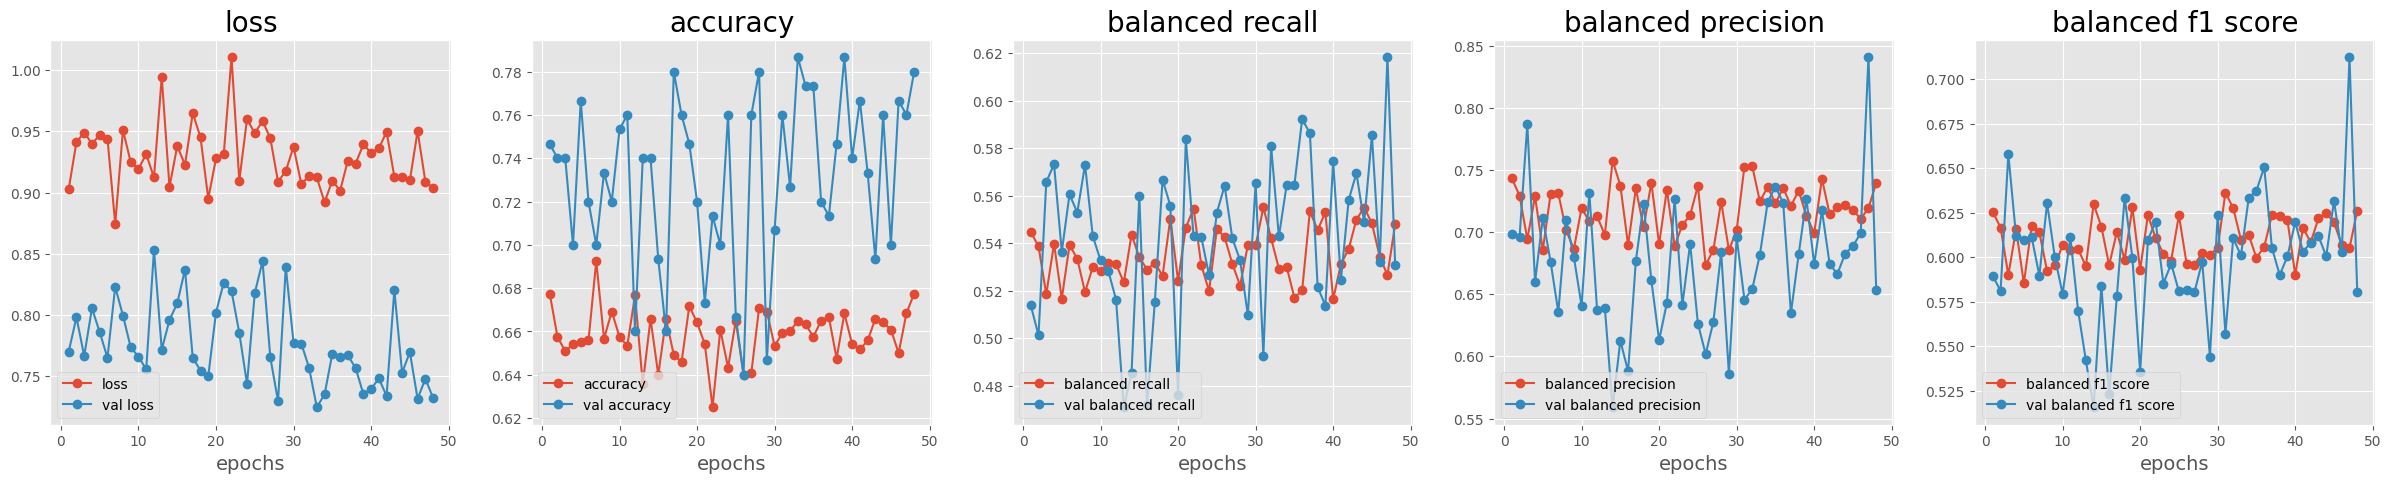

In [ ]:
# Update the plot with the new training history
plot_metrics(model_fit, additional_epochs + n_epochs)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Prediction function
def predict_class(texts_list):
    '''predict class of input text
    Args:
        - texts (list of strings)
    Output:
        - labels (list of int)
    '''
    return [np.argmax(pred) for pred in model.predict(texts_list)]

# Make predictions
y_pred = predict_class(X_test)

# Convert the predicted labels into a NumPy array
y_pred = np.array(y_pred)

# Check if the true labels are in multilabel-indicator format (one-hot encoded)
if y_test.shape[1] > 1:
    # convert to multiclass format
    y_test_multiclass = np.argmax(y_test, axis=1)
else:
    y_test_multiclass = y_test    

# Compare the predicted labels with the true labels
print(classification_report(y_test_multiclass, y_pred))

# Calculate accuracy with sklearn's function
accuracy = accuracy_score(y_test_multiclass, y_pred)
print(f"Accuracy: {accuracy}")

5/5 [==============================] - 5s 1s/step
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.77      0.80      0.78        25
           2       0.82      0.56      0.67        25
           3       0.60      0.60      0.60        25
           4       0.79      0.92      0.85        25
           5       0.70      0.76      0.73        25

    accuracy                           0.76       150
   macro avg       0.76      0.76      0.76       150
weighted avg       0.76      0.76      0.76       150

Accuracy: 0.76
